In [2]:
import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2
%matplotlib inline

from compas_surrogate.cosmic_integration.universe import Universe

PATH = "/Users/avaj0001/Documents/projects/compas_dev/quasir_compass_blocks/data/COMPAS_Output.h5"

uni = Universe.from_compas_h5(PATH)
uni.plot_detection_rate_matrix()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


AttributeError: type object 'Universe' has no attribute 'from_compas_h5'

In [174]:
uni.save("uni.npz")

In [193]:
uni = Universe.from_npz("uni.npz")



In [195]:
uni

0.0215

In [1]:
z = 0.5 * (uni.redshifts[:-1] + uni.redshifts[1:])
mc = uni.COMPAS.mChirp
detections = uni.detection_rate
print(len(mc), len(z))

print(detections.shape)

NameError: name 'uni' is not defined

In [8]:
print(uni.detection_rate.shape, uni.formation_rate.shape, uni.merger_rate.shape)

(11735, 1000) (11735, 10001) (11735, 10001)


In [417]:
merger_rate = uni.merger_rate
merger_rate.shape

(11735, 10001)

In [394]:
def make_detection_plot(redshifts, detection_rates, chirp_masses, idx):
    plt.figure()
    plt.plot(redshifts, detection_rates[idx, :], label=f"Mc: {chirp_masses[idx]:.2f} Msol")
    plt.ylabel("Detection Rate")
    plt.xlabel("Redshift")
    plt.legend()
    plt.show()



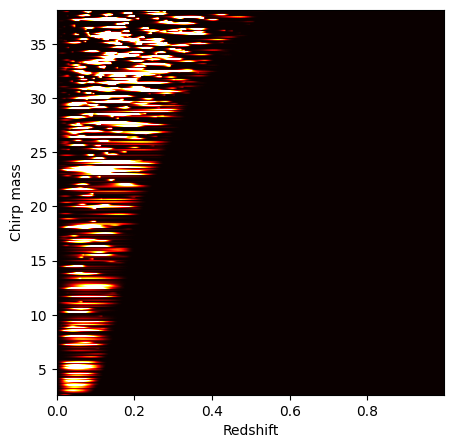

In [111]:
uni.plot_detection_rate_matrix()

Text(0, 0.5, 'Chirp Mass')

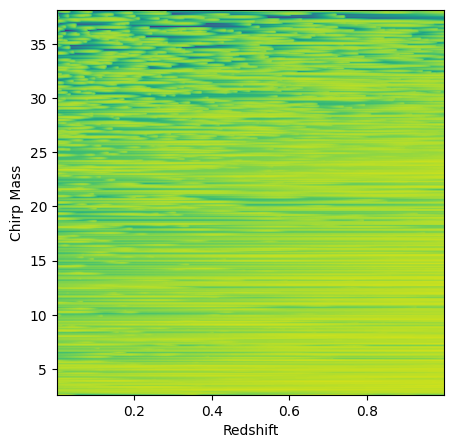

In [426]:
plt.figure(figsize=(5,5))

low_mc, high_mc = np.min(mc), np.max(mc)
low_z, high_z = np.min(redshifts), np.max(redshifts)
# norm = mpl.colors.Normalize(vmin=np.exp(-100), vmax=np.exp(-12))
plt.imshow(merger_rate[sort_idx, 0:1000],  norm='log', aspect='auto', interpolation='gaussian',  origin ='lower', extent=[ low_z, high_z, low_mc, high_mc])
plt.xlabel("Redshift")
plt.ylabel("Chirp Mass")

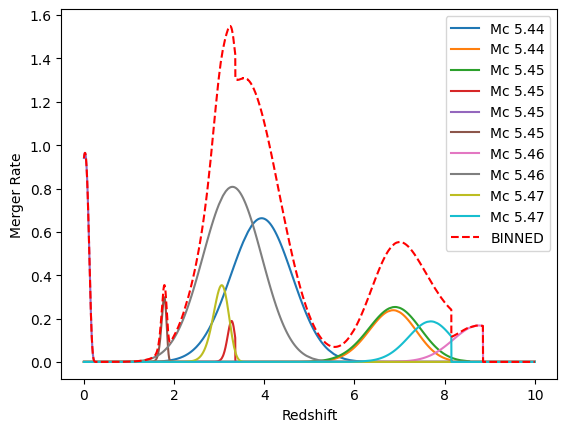

In [440]:

sorted_mr = merger_rate[sort_idx]
sorted_mc = mc[sort_idx]
for i in range(500,510):
    plt.plot(uni.redshifts, sorted_mr[i], label=f"Mc {sorted_mc[i]:.2f}" )
plt.plot(uni.redshifts, np.sum(sorted_mr[500:510, :], axis=0), label="BINNED", color='red', ls="--")
plt.xlabel("Redshift")
plt.ylabel("Merger Rate")
plt.legend()

  0%|          | 0/11735 [00:00<?, ?it/s]

(0.0, 1.0)

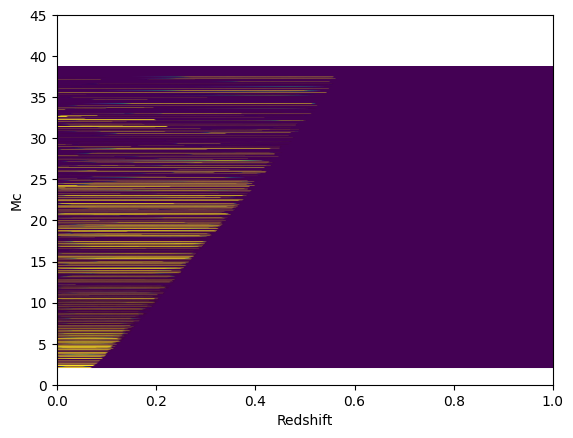

In [374]:
import matplotlib as mpl

plt.figure()

norm = mpl.colors.Normalize(vmin=np.exp(-80), vmax=np.exp(-40))

for i in tqdm(np.argsort(mc)):
    x = redshifts
    y = [mc[i] for _ in range(len(x))]
    z = list(detection_rate[i, :])
    plt.scatter(x, y, c=z, norm=norm)
plt.ylabel("Mc")
plt.xlabel("Redshift")
plt.ylim(0, 45)
plt.xlim(0, 1)

/var/folders/qt/rxjvm_j566v9qn7g754s1v9hzb3p7f/T/ipykernel_35463/2662532800.py:1: RuntimeWarning: divide by zero encountered in log
  x = np.log(detection_rate.ravel())


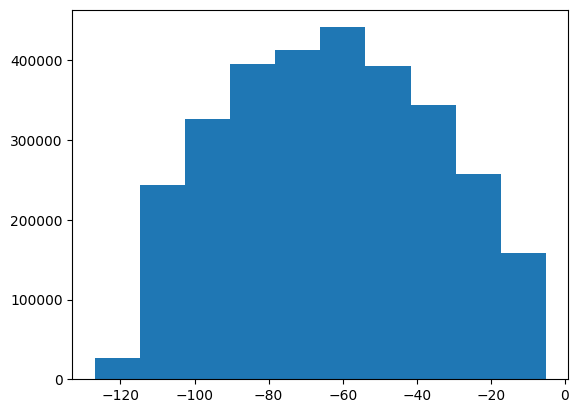

In [237]:
x = np.log(detection_rate.ravel())
x = x[x>-10000]

_ = plt.hist(x)

In [346]:
mc = np.sort(mc)

array([ 2.62493162,  2.63340936,  2.70996412, ..., 38.15917849,
       38.16024936, 38.16060978])

  0%|          | 0/80 [00:00<?, ?it/s]

(0.0, 1.0)

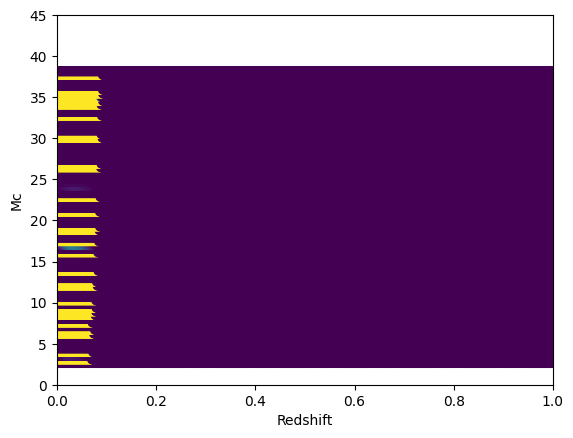

In [388]:


for i, bi in tqdm(enumerate(bins), total=len(bins)):
    x = redshifts
    y = [bi for _ in range(len(x))]
    z = list(binned_rates[i, :])
    plt.scatter(x, y, c=z, norm=norm)
plt.ylabel("Mc")
plt.xlabel("Redshift")
plt.ylim(0, 45)
plt.xlim(0, 1)

# plt.figure(figsize=(5,5))
#
# low_mc, high_mc = np.min(bins), np.max(bins)
# low_z, high_z = np.min(redshifts), np.max(redshifts)
# # norm = mpl.colors.Normalize(vmin=np.exp(-100), vmax=np.exp(-12))
# plt.imshow(binned_rates, cmap=plt.cm.hot, norm='linear', vmin=1e-40, vmax=1e-5, aspect='auto', interpolation='gaussian',  origin='lower', extent=[ low_z, high_z, low_mc, high_mc])

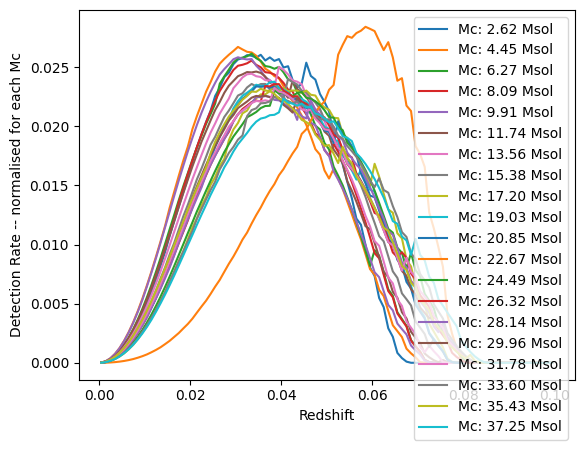

In [410]:
num_bins = 40
bins = np.linspace(low_mc, high_mc, num_bins)
mc_bins = np.digitize(mc[sort_idx], bins)
binned_rates = np.zeros((num_bins, len(z)))
sorted_dr = detection_rate[sort_idx, :]

for bii in range(1, num_bins+1):
    mask = mc_bins[mc_bins==bii]
    binned_rates[bii-1] = np.sum(sorted_dr[mask], axis=0)



plt.figure()
for i in range(0, len(bins), 2):
    y  = binned_rates[i, :]/np.sum(binned_rates[i, :])
    # y  = binned_rates[i, :]
    plt.plot(redshifts[0:100], y[0:100], label=f"Mc: {bins[i]:.2f} Msol")
plt.ylabel("Detection Rate -- normalised for each Mc")
plt.xlabel("Redshift")
plt.legend()
plt.show()

In [ ]:
# if num_chirp_mass_bins is not None:
#     # get midpoints of chirp mass bins
#     mc_bins = np.linspace(mc.min(), mc.max(), num_chirp_mass_bins + 1)
#     mc = 0.5 * (mc_bins[1:] + mc_bins[:-1])
#     # sum over chirp mass bins
#     detections = np.sum(detections.reshape(len(mc_bins) - 1, -1), axis=0)
#     detections = detections.reshape(1, -1)
#


1 BIN [2.62, 3.07]: 14 (2.6249316169408274, 3.032845517869696)
2 BIN [3.07, 3.52]: 29 (3.098159592924743, 3.5213533510462045)
3 BIN [3.52, 3.97]: 44 (3.5307126649734903, 3.960305867386825)
4 BIN [3.97, 4.42]: 73 (3.9859494532496447, 4.422050881769983)
5 BIN [4.42, 4.87]: 120 (4.433477793072892, 4.8711136059397235)
6 BIN [4.87, 5.32]: 163 (4.880160148363969, 5.320852039368593)
7 BIN [5.32, 5.77]: 243 (5.323857379773302, 5.769475835438931)
8 BIN [5.77, 6.22]: 290 (5.7756145995815515, 6.221860411149769)
9 BIN [6.22, 6.67]: 291 (6.22468307380681, 6.673057410151789)
10 BIN [6.67, 7.12]: 307 (6.675040890669942, 7.122659418461099)
11 BIN [7.12, 7.57]: 317 (7.126388335266259, 7.57154993284076)
12 BIN [7.57, 8.02]: 336 (7.575416441376922, 8.020754705879831)
13 BIN [8.02, 8.47]: 363 (8.023095141824715, 8.470857728425367)
14 BIN [8.47, 8.92]: 356 (8.48378240120385, 8.922008932644362)
15 BIN [8.92, 9.37]: 319 (8.92466232751356, 9.368556833201357)
16 BIN [9.37, 9.82]: 335 (9.37253474599411, 9.81979

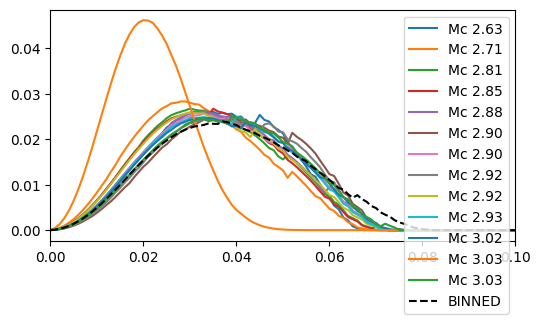

In [108]:
self = uni
z = self.redshifts[self.redshifts < self.max_detectable_redshift]
mc = self.dco_chirp_masses
detections = self.detection_rate

binned_rates, binned_mc, bins = uni.bin_data(detections, num_bins=80)

test_bin = 1
bin_mask = ( bins[test_bin-1] < mc) * (mc < bins[test_bin])

masked_mc = mc[bin_mask]
masked_det = detections[bin_mask]

plt.figure(figsize=(6,3))
for mc_i, mask_d in zip(masked_mc, masked_det):
    plt.plot(z, mask_d/np.sum(mask_d), label=f"Mc {mc_i:.2f}")
plt.plot(z, binned_rates[test_bin]/np.sum(binned_rates[test_bin]), label="BINNED", color='k', ls='--')
plt.xlim(0, 0.1)
plt.legend()


In [102]:
x = np.array([1,2,3,4, -1, -1, -1, 2])
(x < 3)* (x > 0)

array([ True,  True, False, False, False, False, False,  True])

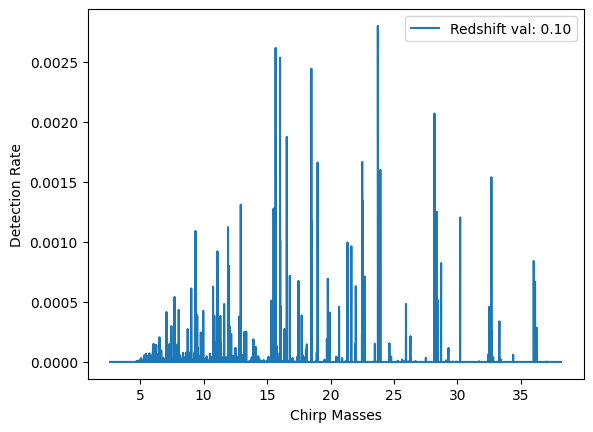

In [110]:
redshift_idx = 100
plt.plot(mc, detections[:, redshift_idx], label=f"Redshift val: {z[redshift_idx]:.2f}")
plt.xlabel("Chirp Masses")
plt.ylabel("Detection Rate")
plt.legend()
